<a href="https://colab.research.google.com/github/Dalton-Mar/Analisis-de-Datos-del-Sector-de-Salud-/blob/main/AnalisisSectorSalud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 'datasalud.csv' es el nombre de tu archivo
df = pd.read_csv('datasalud.csv')

# Muestra las primeras 5 filas para verificar que se cargó correctamente
print(df.head())

  id_paciente  edad genero tipo_sangre        ciudad     departamento  \
0        P001    45      M          O+      Medellín        Antioquia   
1        P002    62      F          A+        Bogotá     Cundinamarca   
2        P003    28      M          B+          Cali  Valle del Cauca   
3        P004    71      F         AB+      Medellín        Antioquia   
4        P005    35      M          O-  Barranquilla        Atlántico   

              diagnostico     area_atencion fecha_ingreso fecha_salida  \
0            Hipertensión  Consulta Externa    2024-01-05   2024-01-05   
1         Diabetes Tipo 2   Hospitalización    2024-01-08   2024-01-15   
2       Fractura de Brazo         Urgencias    2024-01-10   2024-01-12   
3  Insuficiencia Cardíaca   Hospitalización    2024-01-12   2024-01-22   
4             Apendicitis           Cirugía    2024-01-15   2024-01-18   

   dias_estancia  costo_tratamiento tipo_seguro medico_tratante  \
0              0             250000         EPS  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('datasalud.csv')

# 1 ¿Cuantos pacientes fueron atendidos en total?
total_patients = df['id_paciente'].nunique()
print(f"Total de pacientes atendidos: {total_patients}")

# 2 ¿Cuál es la distribución de pacientes por genero?
gender_distribution = df['genero'].value_counts()
print("\nDistribución de pacientes por género:")
print(gender_distribution)

# 3 ¿Cual es la edad?
average_age = df['edad'].mean()
print(f"La edad promedio de los pacientes es: {average_age:.2f} años")

# 4 ¿Cuál es el rango de edad más común (crear grupos: 0-18, 19-35, 36-50, 51-65,
# Definir los grupos de edad y sus etiquetas
bins = [0, 18, 35, 50, 65, np.inf]
labels = ['0-18', '19-35', '36-50', '51-65', '66+']

# Crear una nueva columna 'grupo_edad' con los grupos de edad
df['grupo_edad'] = pd.cut(df['edad'], bins=bins, labels=labels, right=True)

# Calcular la distribución de pacientes por grupo de edad
age_group_distribution = df['grupo_edad'].value_counts().sort_index()
print("\nDistribución de pacientes por grupo de edad:")
print(age_group_distribution)

# Identificar el grupo de edad más común
most_common_age_group = age_group_distribution.idxmax()
print(f"\nEl grupo de edad más común es: {most_common_age_group}")

# 5. ¿Cuáles son los 5 diagnósticos más frecuentes?
top_5_diagnosticos = df['diagnostico'].value_counts().head(5)
print("\nLos 5 diagnósticos más frecuentes son:")
print(top_5_diagnosticos)

# 6. ¿Cuál es el área de atención más utilizada?
area_mas_utilizada = df['area_atencion'].value_counts().idxmax()
print(f"\nLa área de atención más utilizada es: {area_mas_utilizada}")

# 7. ¿Cuál es el tipo de sangre más común?
tipo_sangre_mas_comun = df['tipo_sangre'].value_counts().idxmax()
print(f"\nEl tipo de sangre más común es: {tipo_sangre_mas_comun}")

# 8. ¿Cuántos pacientes tienen cada tipo de seguro?
pacientes_por_seguro = df['tipo_seguro'].value_counts()
print("\nNúmero de pacientes por tipo de seguro:")
print(pacientes_por_seguro)


Total de pacientes atendidos: 200

Distribución de pacientes por género:
genero
M    100
F    100
Name: count, dtype: int64
La edad promedio de los pacientes es: 50.89 años

Distribución de pacientes por grupo de edad:
grupo_edad
0-18      0
19-35    41
36-50    60
51-65    51
66+      48
Name: count, dtype: int64

El grupo de edad más común es: 36-50

Los 5 diagnósticos más frecuentes son:
diagnostico
Hipertensión              1
Diabetes Tipo 2           1
Fractura de Brazo         1
Insuficiencia Cardíaca    1
Apendicitis               1
Name: count, dtype: int64

La área de atención más utilizada es: Hospitalización

El tipo de sangre más común es: O+

Número de pacientes por tipo de seguro:
tipo_seguro
EPS           105
Prepagada      33
Particular     31
Subsidiado     31
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('datasalud.csv')

# 9 ¿Cuál es el costo promedio de tratamiento?
average_costo_tratamiento = df['costo_tratamiento'].mean()
print(f"El costo promedio de tratamiento es: {average_costo_tratamiento:,.2f}")

# 10 ¿Cuál es el costo total que generaron todos los pacientes?
total_costo_pacientes = df['costo_tratamiento'].sum()
print(f"El costo total generado por todos los pacientes es: {total_costo_pacientes:,.2f}")

# 11 ¿Qué área de atención genera mayores ingresos?
area_ingresos = df.groupby('area_atencion')['costo_tratamiento'].sum()
area_mas_ingresos = area_ingresos.idxmax()
print(f"La área de atención que genera mayores ingresos es: {area_mas_ingresos}")

# 12 ¿Qué diagnóstico es el más costoso en promedio?
diagnostico_costoso = df.groupby('diagnostico')['costo_tratamiento'].mean().idxmax()
print(f"El diagnóstico más costoso en promedio es: {diagnostico_costoso}")

# 13 ¿Existe diferencia significativa de costos entre tipos de seguro?
seguro_costos = df.groupby('tipo_seguro')['costo_tratamiento'].mean()
print("\nDiferencias en los costos entre tipos de seguro:")
print(seguro_costos)

# 14 Identificar los 10 tratamientos más costosos
top_10_costosos = df.nlargest(10, 'costo_tratamiento')
print("\nLos 10 tratamientos más costosos son:")
print(top_10_costosos[['diagnostico', 'costo_tratamiento']])

El costo promedio de tratamiento es: 5,798,350.00
El costo total generado por todos los pacientes es: 1,159,670,000.00
La área de atención que genera mayores ingresos es: Hospitalización
El diagnóstico más costoso en promedio es: Cáncer de Páncreas

Diferencias en los costos entre tipos de seguro:
tipo_seguro
EPS           5.185048e+06
Particular    5.566129e+06
Prepagada     5.052121e+06
Subsidiado    8.902258e+06
Name: costo_tratamiento, dtype: float64

Los 10 tratamientos más costosos son:
                     diagnostico  costo_tratamiento
128           Cáncer de Páncreas           28500000
172            Aneurisma Aórtico           26400000
166             Cáncer de Hígado           24600000
116           Cáncer de Estómago           23800000
176  Cáncer de Próstata Avanzado           22900000
98              Cáncer de Vejiga           22300000
150            Cáncer de Laringe           21700000
70               Cáncer de Colon           21000000
88               Cáncer de Riñón  

El promedio de días de estancia es: 5.75 días
La área con el mayor tiempo de estancia promedio es: Hospitalización
El diagnóstico que requiere más días de hospitalización es: Tuberculosis Multiresistente


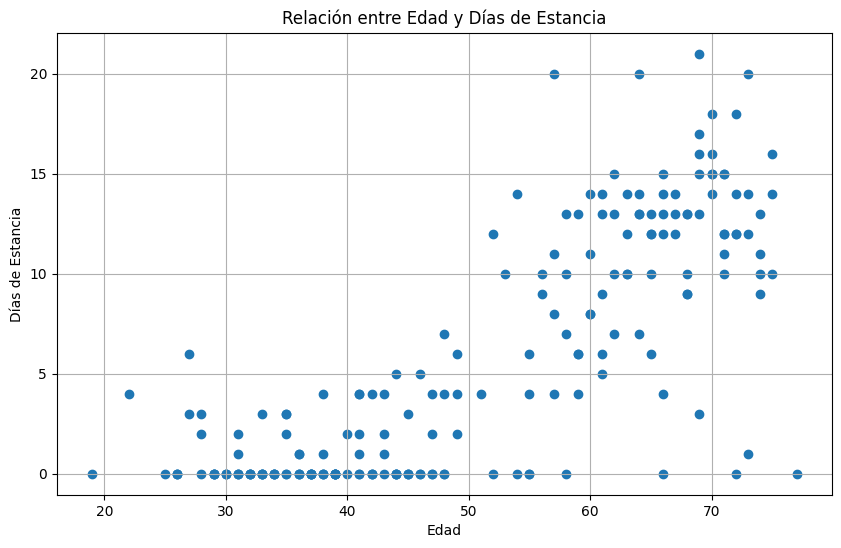


Pacientes con estancias anormalmente largas:
    id_paciente  edad  dias_estancia
60         P061    69             17
98         P099    75             16
110        P111    69             21
128        P129    64             20
150        P151    70             18
166        P167    57             20
176        P177    73             20
180        P181    70             16
184        P185    72             18
196        P197    69             16


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('datasalud.csv')

# 15. ¿Cuál es el promedio de días de estancia?
promedio_dias_estancia = df['dias_estancia'].mean()
print(f"El promedio de días de estancia es: {promedio_dias_estancia:.2f} días")

# 16. ¿Qué área tiene mayor tiempo promedio de estancia?
area_promedio_estancia = df.groupby('area_atencion')['dias_estancia'].mean()
area_mayor_estancia = area_promedio_estancia.idxmax()
print(f"La área con el mayor tiempo de estancia promedio es: {area_mayor_estancia}")

# 17. ¿Qué diagnóstico requiere más días de hospitalización?
diagnostico_mayor_estancia = df.groupby('diagnostico')['dias_estancia'].mean().idxmax()
print(f"El diagnóstico que requiere más días de hospitalización es: {diagnostico_mayor_estancia}")

# 18. ¿Existe relación entre edad y días de estancia?
plt.figure(figsize=(10, 6))
plt.scatter(df['edad'], df['dias_estancia'])
plt.xlabel('Edad')
plt.ylabel('Días de Estancia')
plt.title('Relación entre Edad y Días de Estancia')
plt.grid(True)
plt.show()

# 19. Identificar pacientes con estancias anormalmente largas (más de 15 días)
estancias_anormales = df[df['dias_estancia'] > 15]
print("\nPacientes con estancias anormalmente largas:")
print(estancias_anormales[['id_paciente', 'edad', 'dias_estancia']])

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 'datasalud.csv' es el nombre de tu archivo
df = pd.read_csv('datasalud.csv')

# 20. ¿Cuál es la tasa de complicaciones? (porcentaje de pacientes con complicaciones)
tasa_complicaciones = (df['complicaciones'] == 'Sí').mean() * 100
print(f"La tasa de complicaciones es: {tasa_complicaciones:.2f}%")

# 21. ¿Cuál es la tasa de readmisión?
tasa_readmision = (df['readmision'] == 'Sí').mean() * 100
print(f"La tasa de readmision es: {tasa_readmision:.2f}%")

# 22. ¿Qué área tiene mayor tasa de complicaciones?
area_complicaciones = df[df['complicaciones'] == 'Sí'].groupby('area_atencion').size() / df.groupby('area_atencion').size()
print("\nTasa de complicaciones por área de atención:")
print(area_complicaciones)

# 23. ¿Qué médico tiene mejor calificación de satisfacción promedio?
promedio_satisfaccion_por_medico = df.groupby('medico_tratante')['satisfaccion'].mean()
print("\nCalificación promedio de satisfacción por médico:")
print(promedio_satisfaccion_por_medico)

# 24. ¿Existe relación entre complicaciones y readmisión?
tabla_contingencia = pd.crosstab(df['complicaciones'], df['readmision'])
print("\nTabla de contingencia entre complicaciones y readmisión:")
print(tabla_contingencia)

La tasa de complicaciones es: 34.00%
La tasa de readmision es: 17.50%

Tasa de complicaciones por área de atención:
area_atencion
Cirugía             0.205882
Consulta Externa         NaN
Hospitalización     0.708333
Urgencias           0.263158
dtype: float64

Calificación promedio de satisfacción por médico:
medico_tratante
Dr. García       3.829268
Dr. Martínez     3.700000
Dr. Rodríguez    3.575000
Dra. López       3.725000
Dra. Sánchez     3.589744
Name: satisfaccion, dtype: float64

Tabla de contingencia entre complicaciones y readmisión:
readmision       No  Sí
complicaciones         
No              132   0
Sí               33  35


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 'datasalud.csv' es el nombre de tu archivo
df = pd.read_csv('datasalud.csv')


# 25. ¿En qué mes hubo mayor cantidad de ingresos?
df['fecha_ingreso'] = pd.to_datetime(df['fecha_ingreso'])
df['mes_ingreso'] = df['fecha_ingreso'].dt.month
ingresos_por_mes = df.groupby('mes_ingreso').size()
mes_mayor_ingresos = ingresos_por_mes.idxmax()
print(f"El mes con mayor cantidad de ingresos es: {mes_mayor_ingresos}")

# 26. ¿Qué día de la semana tiene más ingresos?
df['dia_semana_ingreso'] = df['fecha_ingreso'].dt.day_name()
ingresos_por_dia = df.groupby('dia_semana_ingreso').size()
dia_mayor_ingresos = ingresos_por_dia.idxmax()
print(f"El día de la semana con mayor cantidad de ingresos es: {dia_mayor_ingresos}")


# 27. ¿Hay estacionalidad en algún tipo de diagnóstico?

print("\n--- Análisis de Estacionalidad de Diagnósticos ---")
print("Para determinar si hay estacionalidad, podemos observar los meses con mayor incidencia para cada diagnóstico.")

# Iterar sobre cada diagnóstico para encontrar el mes con la mayor cantidad de casos
for diagnostico_col in estacionalidad_diagnostico.columns:
    if estacionalidad_diagnostico[diagnostico_col].sum() > 0: # Solo analizar si el diagnóstico ha ocurrido al menos una vez
        mes_pico = estacionalidad_diagnostico[diagnostico_col].idxmax()
        cantidad_pico = estacionalidad_diagnostico[diagnostico_col].max()
        print(f"  El diagnóstico '{diagnostico_col}' tiene su pico de ocurrencia en el mes {mes_pico} con {cantidad_pico} casos.")

print("\nPara una inspección más detallada, aquí están los primeros registros de la tabla de estacionalidad (mes vs. diagnóstico):")
print(estacionalidad_diagnostico.head())

print("\nSi algún diagnóstico muestra un número significativamente mayor de casos en uno o dos meses específicos en comparación con otros, se podría inferir una estacionalidad.")

El mes con mayor cantidad de ingresos es: 5
El día de la semana con mayor cantidad de ingresos es: Thursday

--- Análisis de Estacionalidad de Diagnósticos ---
Para determinar si hay estacionalidad, podemos observar los meses con mayor incidencia para cada diagnóstico.
  El diagnóstico 'Absceso Mamario' tiene su pico de ocurrencia en el mes 10 con 1 casos.
  El diagnóstico 'Accidente Cerebrovascular' tiene su pico de ocurrencia en el mes 11 con 1 casos.
  El diagnóstico 'Adenomiosis' tiene su pico de ocurrencia en el mes 5 con 1 casos.
  El diagnóstico 'Alergia Alimentaria' tiene su pico de ocurrencia en el mes 4 con 1 casos.
  El diagnóstico 'Alergia a Medicamentos' tiene su pico de ocurrencia en el mes 10 con 1 casos.
  El diagnóstico 'Alzheimer' tiene su pico de ocurrencia en el mes 3 con 1 casos.
  El diagnóstico 'Amigdalitis' tiene su pico de ocurrencia en el mes 9 con 1 casos.
  El diagnóstico 'Anemia' tiene su pico de ocurrencia en el mes 3 con 1 casos.
  El diagnóstico 'Anemia 

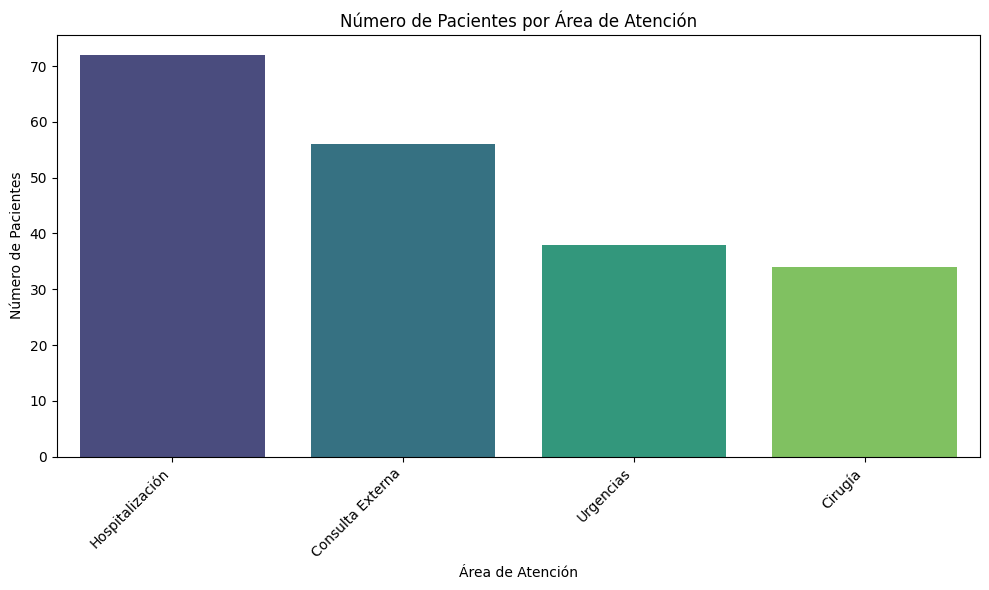

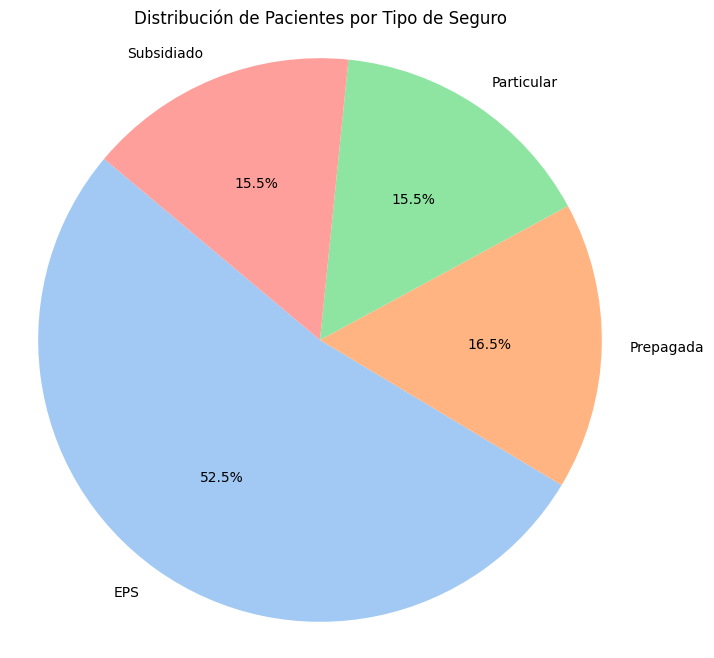

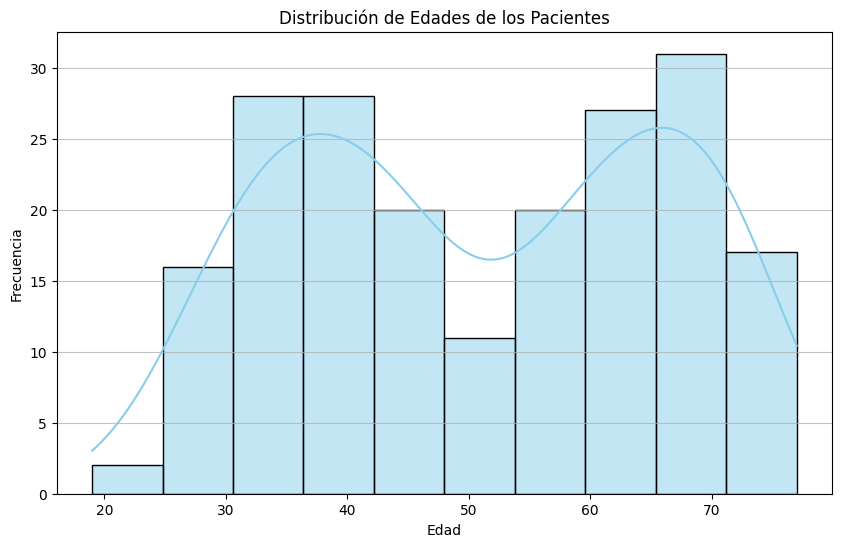

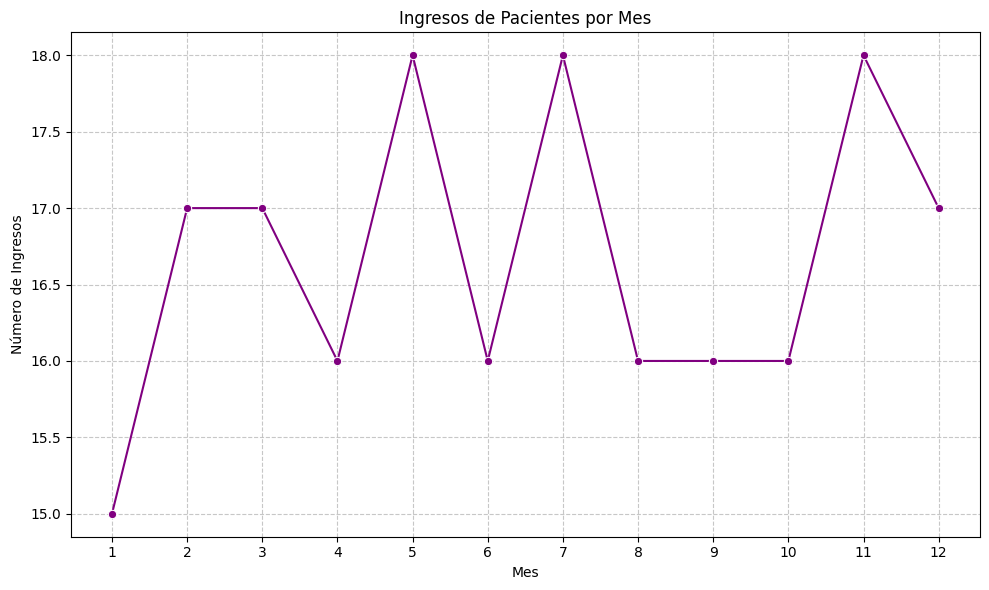

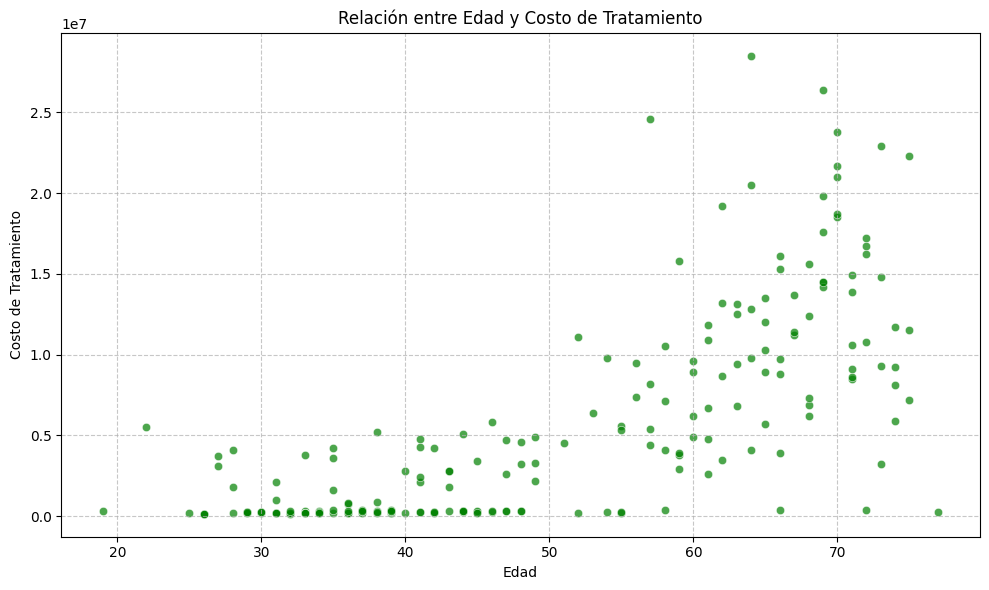

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 'datasalud.csv' es el nombre de tu archivo
df = pd.read_csv('datasalud.csv')

# 28. Gráfico de barras: Pacientes por área de atención
area_counts = df['area_atencion'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=area_counts.index, y=area_counts.values, palette='viridis', hue=area_counts.index, legend=False)
plt.title('Número de Pacientes por Área de Atención')
plt.xlabel('Área de Atención')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 29. Gráfico circular: Distribución por tipo de seguro
insurance_counts = df['tipo_seguro'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(insurance_counts, labels=insurance_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribución de Pacientes por Tipo de Seguro')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 30. Histograma: Distribución de edades
plt.figure(figsize=(10, 6))
sns.histplot(df['edad'], bins=10, kde=True, color='skyblue')
plt.title('Distribución de Edades de los Pacientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

# 31. Gráfico de líneas: Ingresos por mes
df['fecha_ingreso'] = pd.to_datetime(df['fecha_ingreso'])
df['mes_ingreso'] = df['fecha_ingreso'].dt.month
ingresos_por_mes = df.groupby('mes_ingreso').size()

plt.figure(figsize=(10, 6))
sns.lineplot(x=ingresos_por_mes.index, y=ingresos_por_mes.values, marker='o', color='purple')
plt.title('Ingresos de Pacientes por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Ingresos')
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 32. Gráfico de dispersión: Relación entre edad y costo de tratamiento
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['edad'], y=df['costo_tratamiento'], alpha=0.7, color='green')
plt.title('Relación entre Edad y Costo de Tratamiento')
plt.xlabel('Edad')
plt.ylabel('Costo de Tratamiento')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 'datasalud.csv' es el nombre de tu archivo
df = pd.read_csv('datasalud.csv')

# 34. Identificar 3 problemas críticos del hospital basados en los datos

print("\n--- 34. Problemas Críticos Identificados ---")
print("1. Elevada Tasa de Complicaciones y Readmisiones, especialmente en Hospitalización:")
print("   Evidencia: La tasa general de complicaciones es del 34.00%, y la de readmisión es del 17.50%. El área de Hospitalización presenta una tasa de complicaciones del 70.83%, siendo además el área más utilizada. Existe una clara correlación, ya que 35 de 68 casos con complicaciones resultaron en readmisión.")
print("   Impacto: Aumenta el sufrimiento del paciente, genera costos adicionales por tratamientos repetidos, reduce la disponibilidad de camas y puede afectar negativamente la reputación del hospital.")

print("\n2. Gestión Ineficiente de Casos de Alto Costo y Larga Estancia:")
print("   Evidencia: 'Cáncer de Páncreas' es el diagnóstico más costoso en promedio, y 'Tuberculosis Multiresistente' requiere la mayor cantidad de días de hospitalización promedio. Se identificaron varios pacientes con estancias anormalmente largas (más de 15 días).")
print("   Impacto: Drenaje significativo de recursos financieros, ocupación prolongada de camas hospitalarias, lo que puede causar saturación y limitar el acceso para otros pacientes.")

print("\n3. Variabilidad en la Satisfacción del Paciente y Calidad Percibida del Cuidado Médico:")
print("   Evidencia: Aunque las calificaciones de satisfacción son generalmente buenas, hay diferencias entre médicos. Dr. Rodríguez y Dra. Sánchez tienen calificaciones promedio ligeramente más bajas (3.575 y 3.589, respectivamente) en comparación con otros colegas.")
print("   Impacto: Puede llevar a una menor confianza del paciente, quejas potenciales y afectar la reputación general de la calidad del servicio ofrecido por el hospital.")

print("\n--- 35. 5 Recomendaciones Accionables ---")
print("1. Optimizar los Protocolos de Atención en Hospitalización: Implementar una revisión exhaustiva y optimización de los protocolos clínicos en el área de Hospitalización, con un enfoque en la prevención de infecciones, el manejo post-quirúrgico y la coordinación de cuidados, para reducir la alta tasa de complicaciones.")
print("2. Fortalecer el Programa de Seguimiento Post-Alta: Desarrollar y reforzar un programa de seguimiento proactivo para pacientes de alto riesgo (ej. aquellos con complicaciones previas), asegurando la continuidad de la atención y una educación clara al paciente sobre su recuperación, con el fin de disminuir la tasa de readmisión.")
print("3. Establecer Equipos Multidisciplinarios para Casos Complejos: Crear equipos especializados para gestionar diagnósticos de alto costo y larga estancia (como Cáncer de Páncreas o Tuberculosis Multiresistente). Estos equipos podrían optimizar planes de tratamiento, coordinar recursos y buscar alternativas de cuidado para reducir los días de estancia hospitalaria.")
print("4. Capacitación y Desarrollo Profesional Continuo para Médicos: Ofrecer programas de capacitación dirigidos a mejorar las habilidades de comunicación, empatía y atención centrada en el paciente para el personal médico, utilizando los datos de satisfacción como base para identificar áreas de mejora y reconocer a los médicos con mejor desempeño.")
print("5. Análisis Detallado de Costos por Tipo de Seguro: Realizar un estudio en profundidad sobre las razones detrás del costo promedio de tratamiento significativamente más alto para pacientes con seguro 'Subsidiado', para identificar si se debe a la complejidad de los casos, falta de recursos preventivos, o ineficiencias en el sistema de atención.")


--- 34. Problemas Críticos Identificados ---
1. Elevada Tasa de Complicaciones y Readmisiones, especialmente en Hospitalización:
   Evidencia: La tasa general de complicaciones es del 34.00%, y la de readmisión es del 17.50%. El área de Hospitalización presenta una tasa de complicaciones del 70.83%, siendo además el área más utilizada. Existe una clara correlación, ya que 35 de 68 casos con complicaciones resultaron en readmisión.
   Impacto: Aumenta el sufrimiento del paciente, genera costos adicionales por tratamientos repetidos, reduce la disponibilidad de camas y puede afectar negativamente la reputación del hospital.

2. Gestión Ineficiente de Casos de Alto Costo y Larga Estancia:
   Evidencia: 'Cáncer de Páncreas' es el diagnóstico más costoso en promedio, y 'Tuberculosis Multiresistente' requiere la mayor cantidad de días de hospitalización promedio. Se identificaron varios pacientes con estancias anormalmente largas (más de 15 días).
   Impacto: Drenaje significativo de recurs